In [204]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

# Libraries 

In [205]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os 
import shutil
import math

import tensorflow.keras as K
import tensorflow as tf



from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Flatten , Dense, Dropout , MaxPool2D

# Data Pre-Processing 

In [206]:
ROOT_DIR = "./garbage_classification"


image_classes = {}

for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
        image_classes[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

image_classes

{'battery': 17,
 'biological': 17,
 'brown-glass': 16,
 'cardboard': 17,
 'clothes': 17,
 'green-glass': 16,
 'metal': 16,
 'paper': 16,
 'plastic': 17,
 'shoes': 17,
 'trash': 17,
 'white-glass': 16}

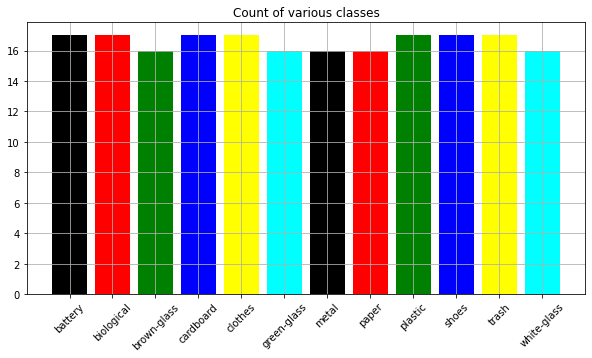

In [207]:
plt.figure(figsize=(10,5))
plt.bar(x = image_classes.keys(), height= image_classes.values(), color=['black', 'red', 'green', 'blue', 'yellow' ,'cyan'])
plt.title("Count of various classes")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

As we see here its pretty clear that we have a average of 1000 images in each class... but the number of images in 'Cloths' class is slightly higher! we will randomly remove images to balance tha data 


In [208]:
# we create a training folder 

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./train/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(70/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./train', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

Train Folder exsist


In [209]:
# we create a Validation folder 

if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./val/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(15/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./val', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

Train Folder exsist


In [210]:
# we create a test folder 

if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    if dir != '.DS_Store':
      os.makedirs("./test/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(15/100*image_classes[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join('./test', dir)
        shutil.copy(O,D)
        os.remove(O)
else:
  print("Train Folder exsist")

Train Folder exsist


In [211]:
train_path  = "./train"
valid_path  = "./val"
test_path   = "./test"

In [212]:
#train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255, featurewise_center= True,
#    samplewise_center=True, featurewise_std_normalization=True,  samplewise_std_normalization=True,   rotation_range=45,  width_shift_range=0.4,  height_shift_range=0.4)
#
#train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224), batch_size=64)


#validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, rescale= 1./255 )

#valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))


#test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, rescale= 1./255 )
#test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)



In [213]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rotation_range=45,  width_shift_range=0.4,  height_shift_range=0.4)

train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224), batch_size=64)

Found 10794 images belonging to 12 classes.


In [214]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 2261 images belonging to 12 classes.


In [215]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input)
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 2261 images belonging to 12 classes.


In [216]:
train.class_indices

{'battery': 0,
 'biological': 1,
 'brown-glass': 2,
 'cardboard': 3,
 'clothes': 4,
 'green-glass': 5,
 'metal': 6,
 'paper': 7,
 'plastic': 8,
 'shoes': 9,
 'trash': 10,
 'white-glass': 11}

In [217]:
t_img , label = train.next()

In [218]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


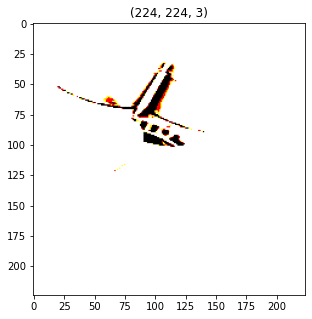

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


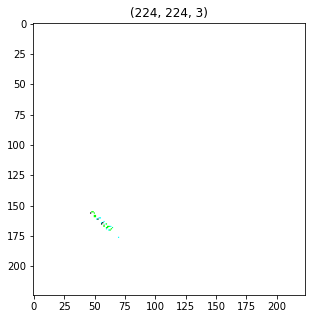

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


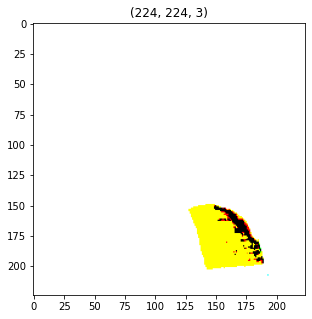

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


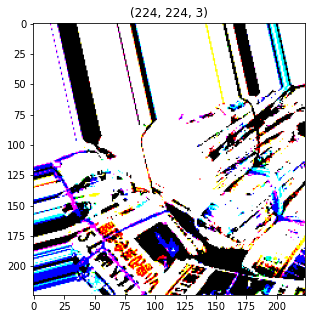

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


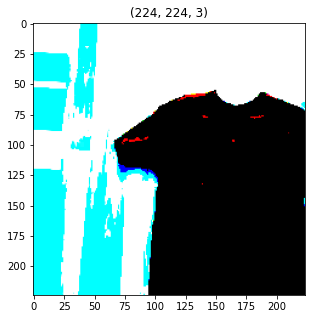

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


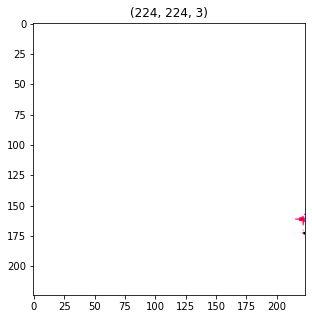

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


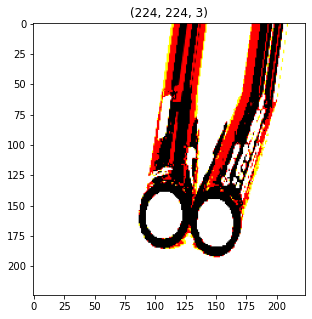

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


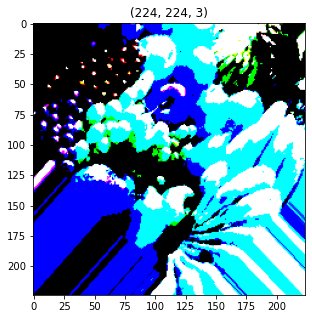

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


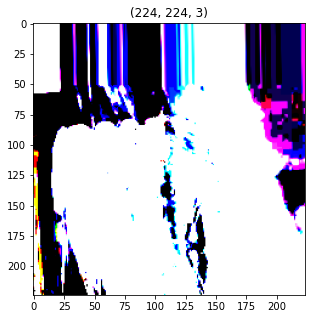

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


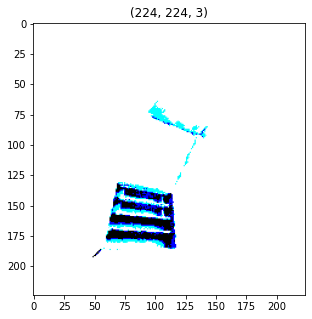

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


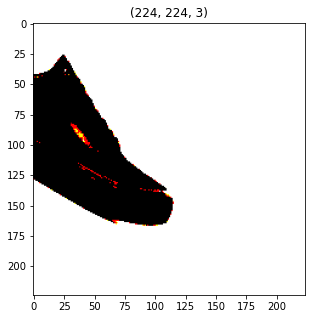

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


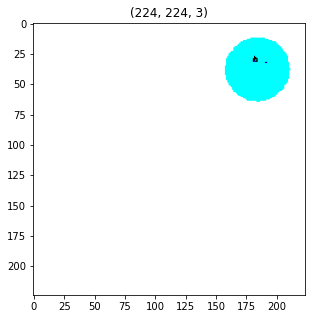

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


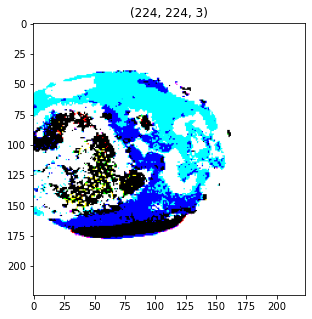

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


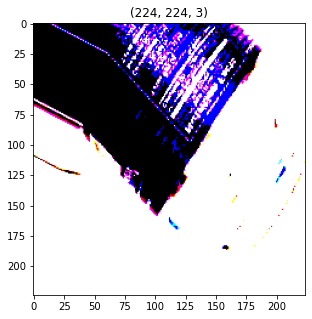

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


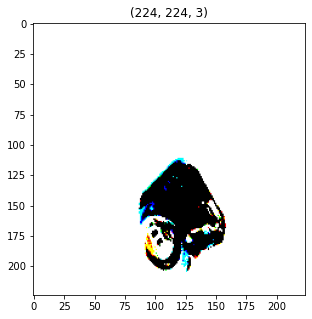

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


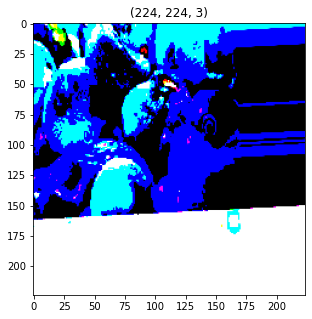

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


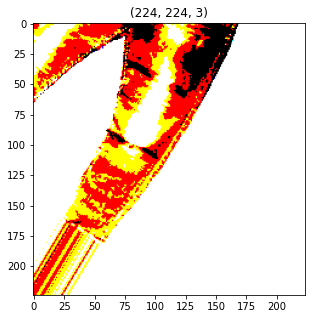

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


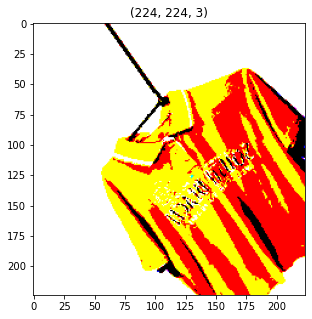

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


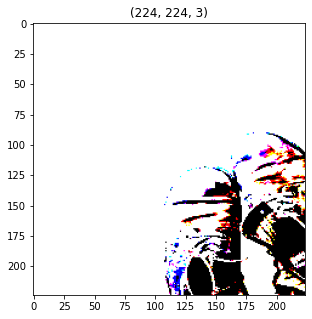

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


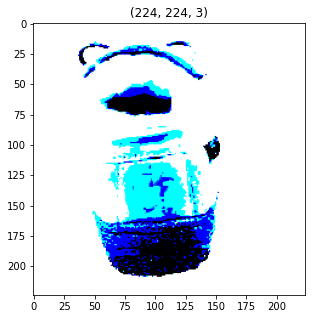

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


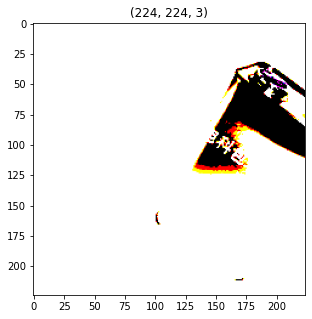

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


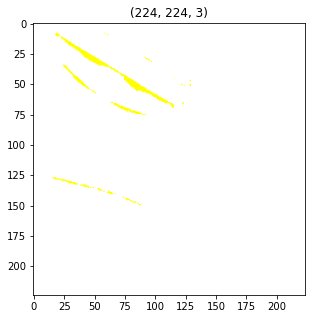

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


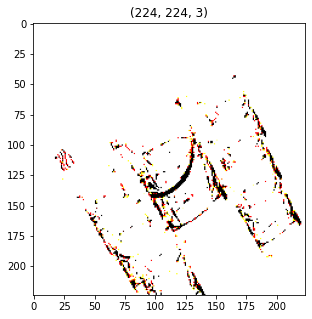

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


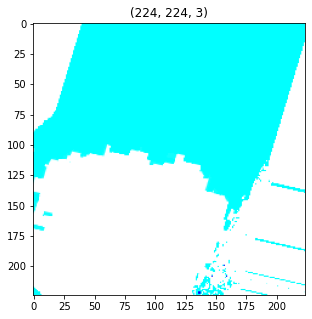

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


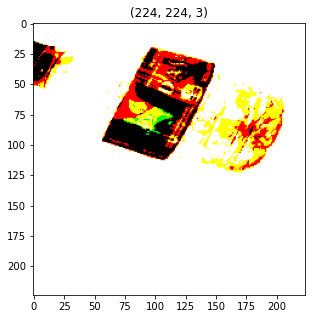

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


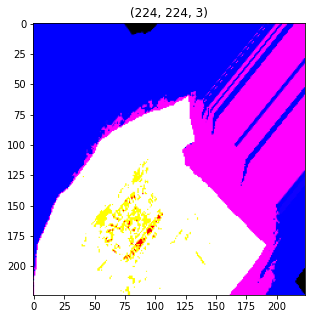

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


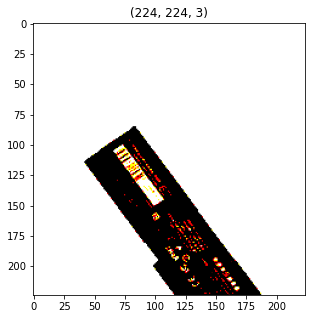

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


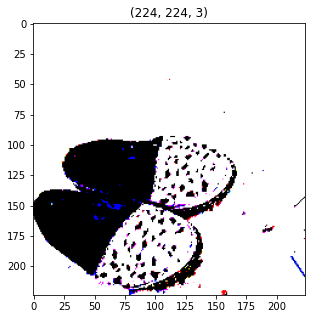

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


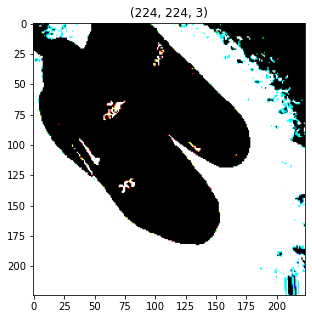

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


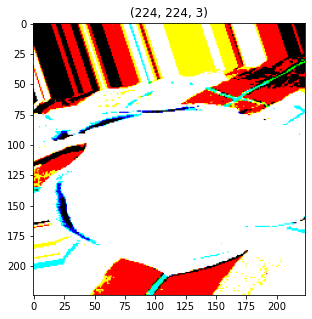

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


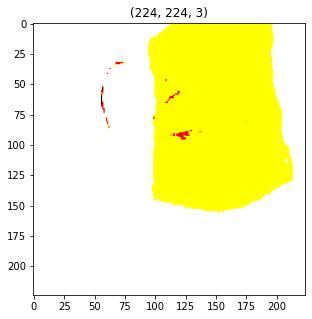

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


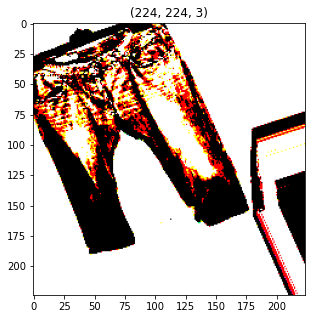

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


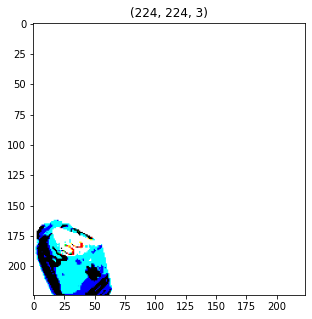

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


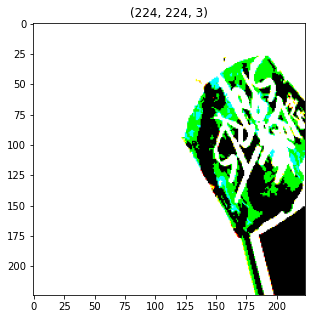

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


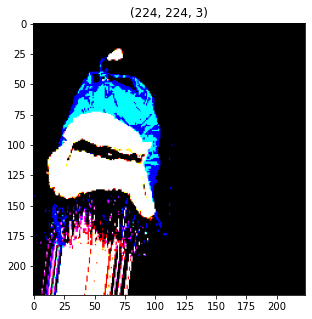

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


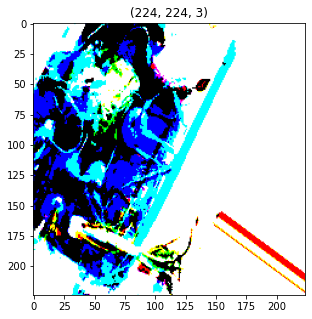

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


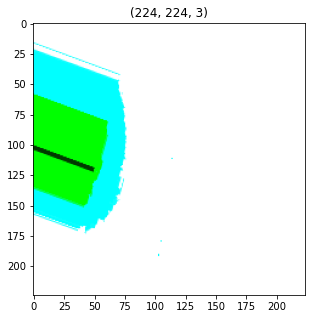

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


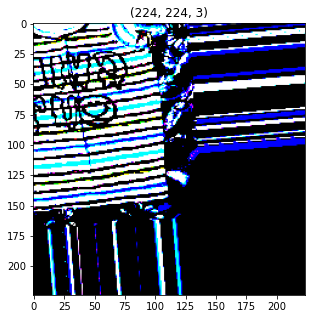

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


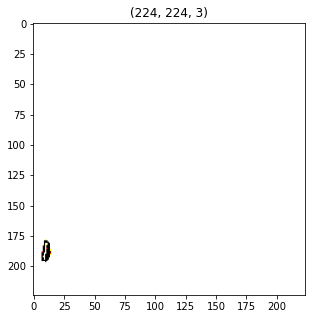

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


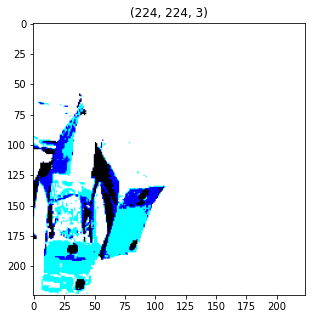

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


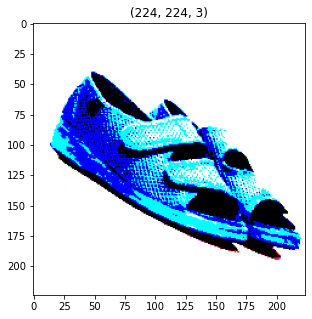

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


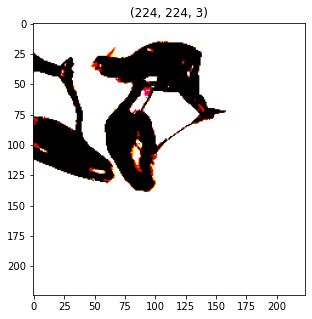

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


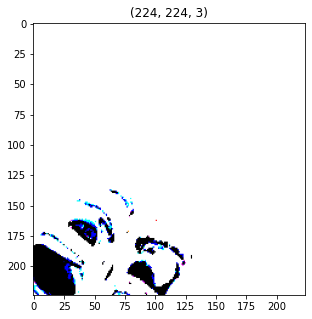

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


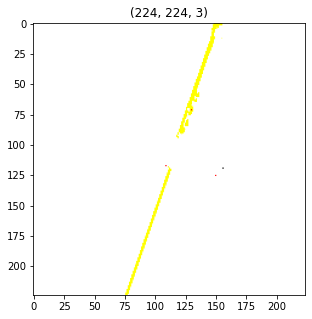

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


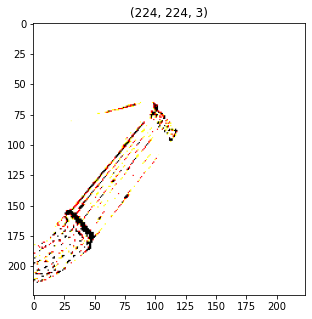

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


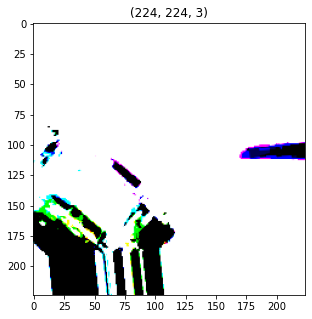

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


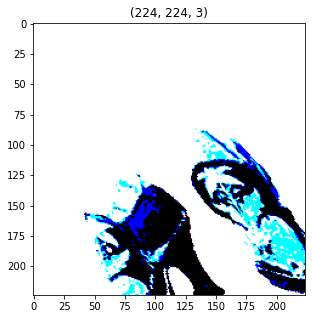

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


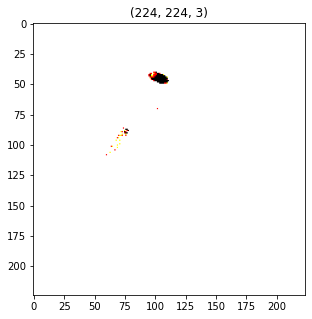

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


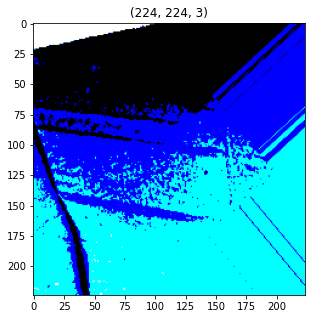

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


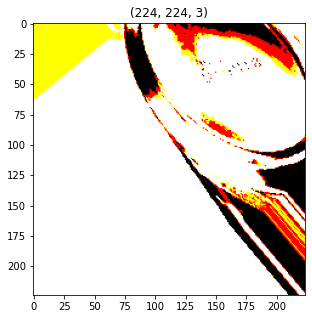

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


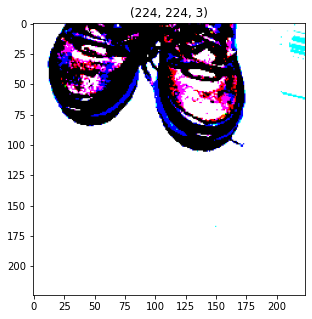

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


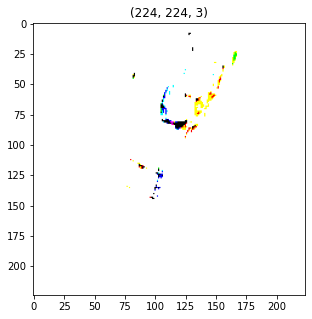

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


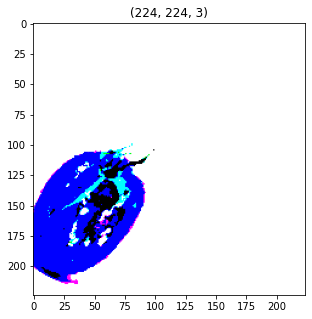

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


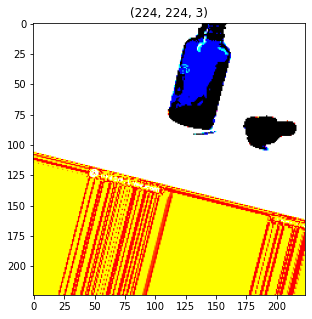

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


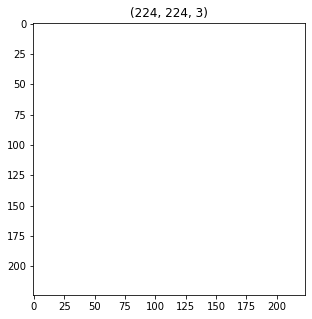

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


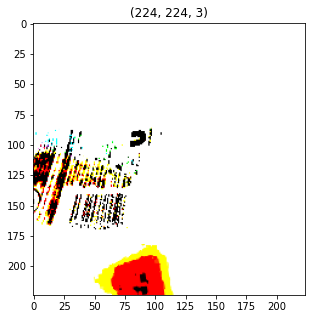

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


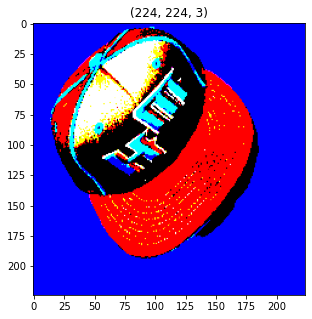

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


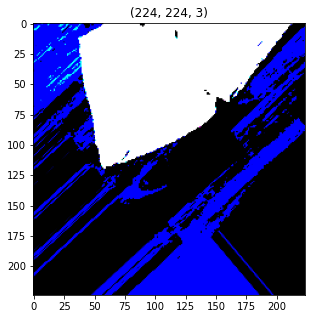

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


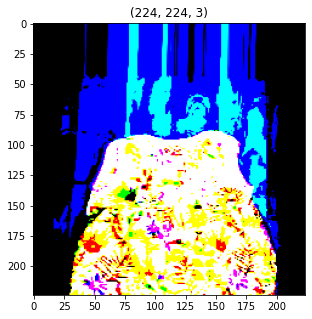

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


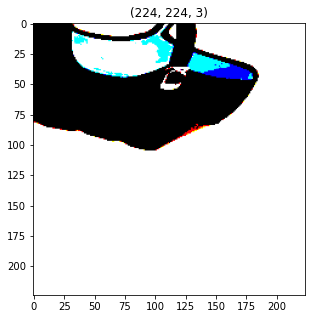

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


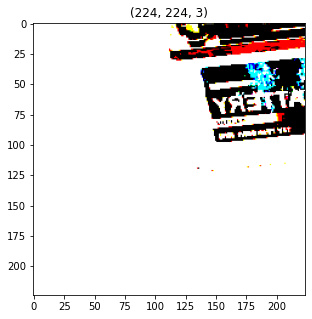

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


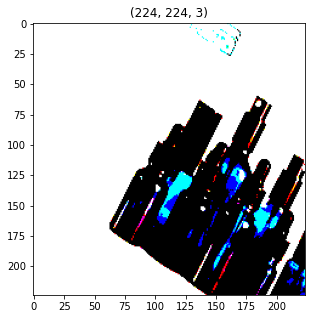

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


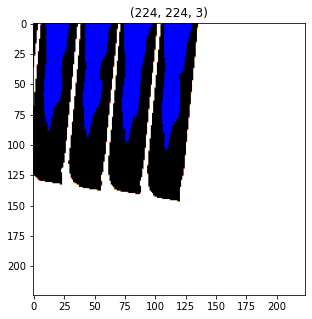

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


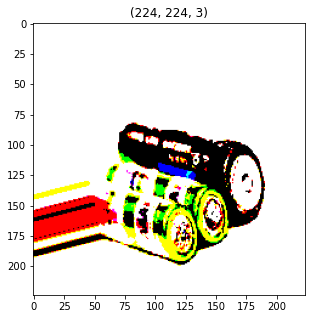

In [219]:
plotImages(t_img, label)

In [220]:
ResNet = ResNet50( input_shape=(224,224,3), include_top= False, weights= 'imagenet')

In [221]:
#Only allow the final block in the architecture to be trained
for layer in ResNet.layers[:143]:           
    layer.trainable = False

for layer in ResNet.layers[143:]:
    layer.trainable = True


for instance in ResNet.layers:
    print(instance, instance.name, instance.trainable)


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001CA241C6160> input_8 False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001CA1EBA02E0> conv1_pad False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CA1EBA0220> conv1_conv False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CA00EA6040> conv1_bn False
<tensorflow.python.keras.layers.core.Activation object at 0x000001CA1EBB0730> conv1_relu False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001CA1EBB0F40> pool1_pad False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001CA4D940760> pool1_pool False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CA4D941EE0> conv2_block1_1_conv False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CA05039E80> conv2_block1_1_bn False
<tensorflow.python.keras.layers.core.Activation ob

In [222]:
model = K.models.Sequential()
model.add(ResNet)
model.add(K.layers.Flatten())
model.add(K.layers.Dense(units= 12 , activation='softmax', name = 'predictions'))


In [223]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 100352)            0         
_________________________________________________________________
predictions (Dense)          (None, 12)                1204236   
Total params: 24,791,948
Trainable params: 16,180,236
Non-trainable params: 8,611,712
_________________________________________________________________


In [224]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [225]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 10, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [226]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 8.1461 - accuracy: 0.5047
Epoch 00001: val_accuracy improved from -inf to 0.37305, saving model to bestmodel.h5
10/10 [==============================] - 69s 7s/step - loss: 8.1461 - accuracy: 0.5047 - val_loss: 1129.8005 - val_accuracy: 0.3730
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.0049 - accuracy: 0.7422
Epoch 00002: val_accuracy improved from 0.37305 to 0.41309, saving model to bestmodel.h5
10/10 [==============================] - 76s 8s/step - loss: 1.0049 - accuracy: 0.7422 - val_loss: 7662.2622 - val_accuracy: 0.4131
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.6761 - accuracy: 0.8156
Epoch 00003: val_accuracy improved from 0.41309 to 0.43945, saving model to bestmodel.h5
10/10 [==============================] - 84s 8s/step - loss: 0.6761 - accuracy: 0.8156 - val_loss: 3842.6638 - val_accuracy: 0.4395
Epoch 4/30
10/10 [==============================] - ETA: 0

In [227]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

In [228]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

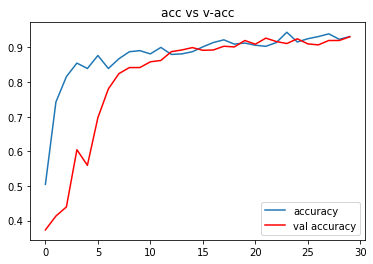

In [229]:
plt.plot(h['accuracy'] , label = 'accuracy')
plt.plot(h['val_accuracy'] , c = "red", label = 'val accuracy')
plt.title("acc vs v-acc")
plt.legend()
plt.show()

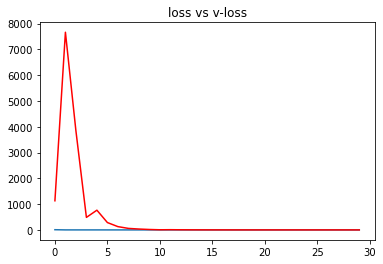

In [230]:
plt.plot(h['loss'] , label = 'loss')
plt.plot(h['val_loss'] , c = "red", label = 'val loss')
plt.title("loss vs v-loss")
plt.show()

In [231]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.902255654335022 %
